# <u style = "color: green;"><p style = "color: green;"> ***Clustering*** </p></u> 

### Imports

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.manifold import TSNE

### Loading dataset

In [9]:
df = pd.read_csv('clean_data.csv')

### Encoding features

In [10]:
X = df[['family_history', 'treatment', 'work_interfere', 'remote_work', 'coworkers', 'supervisor']] #Using those features which can help to clearly design and visualize clusters

encoder = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), X.columns)
])

X_encoded = encoder.fit_transform(X)


In [11]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_encoded)

### Comparing different models on basis of Silhouette score

[0.3495444357395172, 0.3878435492515564, 0.42028212547302246, 0.39174914360046387, 0.3858516216278076, 0.4046421945095062, 0.4182640612125397, 0.4258618652820587, 0.4087069630622864]


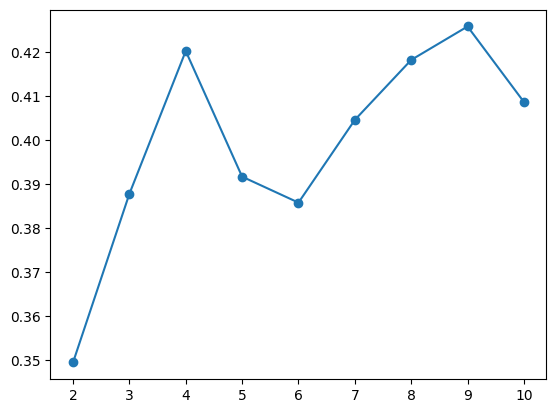

In [17]:
kmeans_scores = []
for k in range(2, 11):
    model = KMeans(random_state=42, n_clusters=k)
    labels = model.fit_predict(X_tsne)
    score = silhouette_score(X_tsne, labels)
    kmeans_scores.append(score)

print(kmeans_scores)
plt.plot(range(2, 11), kmeans_scores, marker='o')

[0.3382168114185333, 0.40094053745269775, 0.39394137263298035, 0.3960477113723755, 0.3924381136894226, 0.38920703530311584, 0.3893955647945404, 0.3871709108352661, 0.3832005560398102]


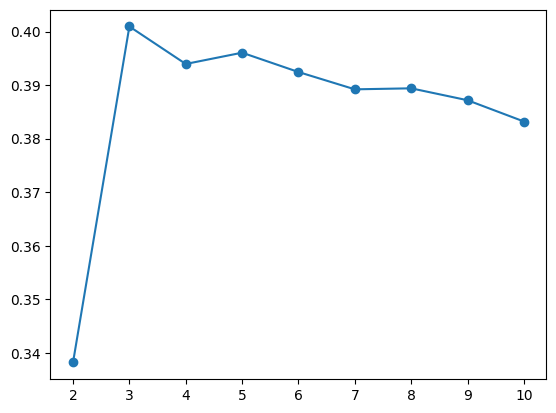

In [18]:
aglo_scores = []
for k in range(2, 11):
    model = AgglomerativeClustering(n_clusters=k)
    labels = model.fit_predict(X_tsne)
    score = silhouette_score(X_tsne, labels)
    aglo_scores.append(score)

print(aglo_scores)
plt.plot(range(2, 11), aglo_scores, marker='o')

After comparing, we can conclude that it is optimal to use K Means clustering with n_clusters = 4

### Visualising Clusters

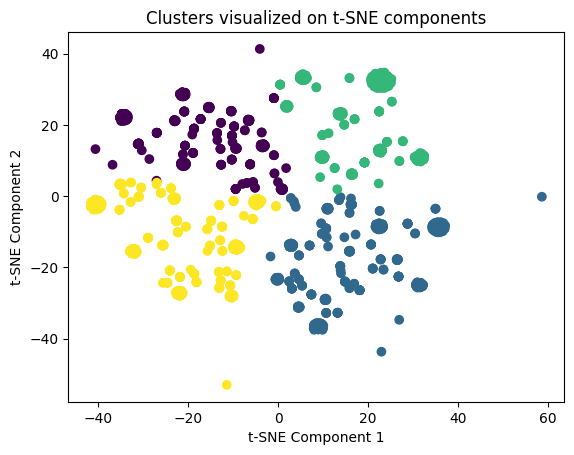

In [26]:
import matplotlib.pyplot as plt


model = KMeans(n_clusters=4, random_state=42)
labels = model.fit_predict(X_tsne)

plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels)
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('Clusters visualized on t-SNE components')
plt.show()


### Clusters Description

We have identified 4 major clusters of all the available datapoints, each cluster represent a different mental health persona which can understand from the following description:

**Persona 1 – Silent Sufferers**

This group often feels alone with their problems. They don’t think their workplace supports them and don’t feel safe talking about mental health. Their stress is high, but they rarely ask for help, even if they’ve faced issues before. Most of them work in smaller companies where support is harder to find.

**Persona 2 – Open Advocates**

These are the people who are open about mental health and encourage others to talk about it too. They know what help is available at work and use it when they need to. Many work in bigger or hybrid companies where talking about mental health is more common.

**Persona 3 – Under‑Supported Professionals**

This group knows they are struggling but feels like their workplace doesn’t help enough. Their stress is high, and while they want to talk about it, they often don’t get the support they need. Many of them are in large companies or remote roles, where help exists on paper but doesn’t really reach them.

**Persona 4 – Resilient Optimists**

These people are generally doing well mentally. They feel supported by their workplace, don’t face much stress, and are open to talking about mental health if needed. Many are younger or have flexible jobs, and they often show what good support can look like.

### Summary

I have used the most relevant features for making clusters of the available datapoints, used t-SNE for dimension reduction and clear visuaization and compared K-Means and Agglomerative clustering on the basis of Silhouette Score for number of clusters varying from 2 to 10. I used K-Means with n_clusters=4 and then visualised it and gave brief description for each cluster